<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This appears to be a dataset relating to the noise produced by different types of airfoils on NASA aircraft. It is composed of 1503 rows, 6 columns, with no missing values. The first five columns are potential feature variables, and the last is the target variable of sound level in decibels. A model for this dataset could potentially be used to determine which features relate to lower decibel levels (on the assumption that the aim is to reduce noise levels produced by NASA aircraft - noise pollution etc.)

- Find out how many rows and columns are in `noise`.

In [4]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [5]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [6]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [7]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

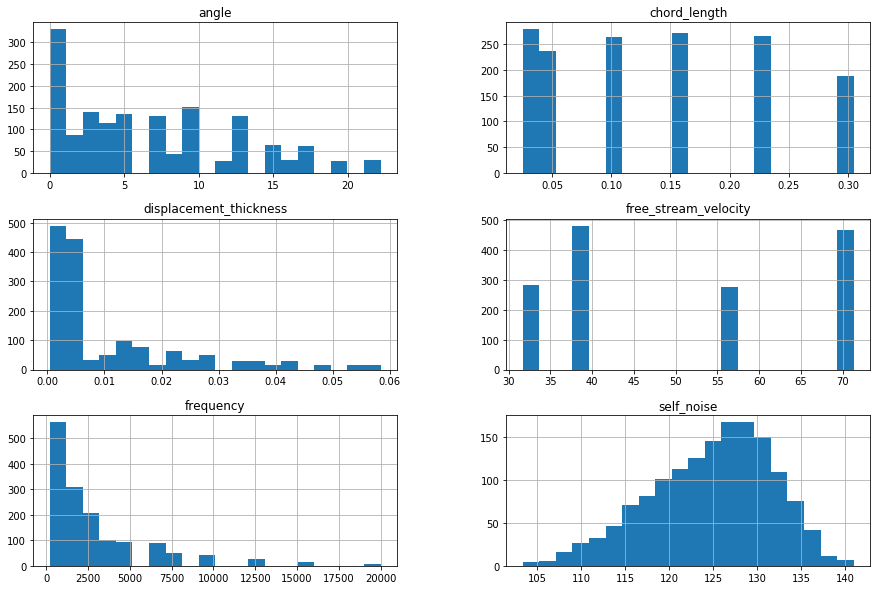

In [8]:
axes = noise.hist(figsize=(15, 10),bins=20)

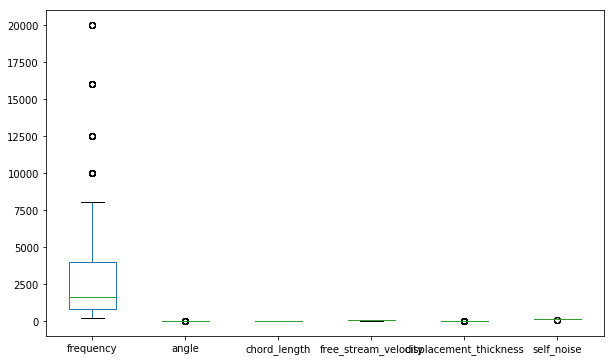

In [9]:
axes = noise.plot(kind='box',figsize=(10, 6)) #, showfliers=False)

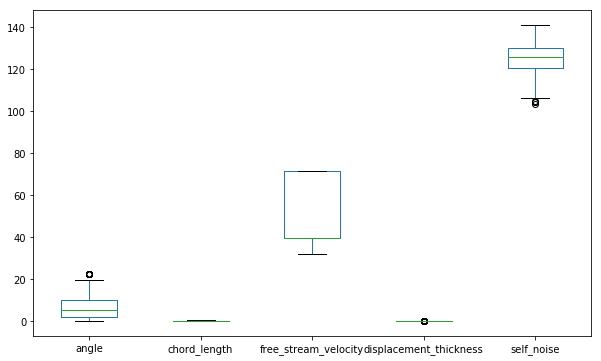

In [10]:
noise_bp = noise.drop('frequency', axis='columns')
axes = noise_bp.plot(kind='box',figsize=(10, 6))

- Which variables are approximately normally distributed?

It appears that self_noise is the closest to normal distrubtion curve (though showing a small left skew) ... chord_length and free_stream_velocity are relatively flat, but may be considered somewhat normal in distribution

- Which variables show strong skew?

It appears that angle, displacement_frequency and frequency are showing strong right skew

- Make a scatterplot of each feature variable with the target variable.

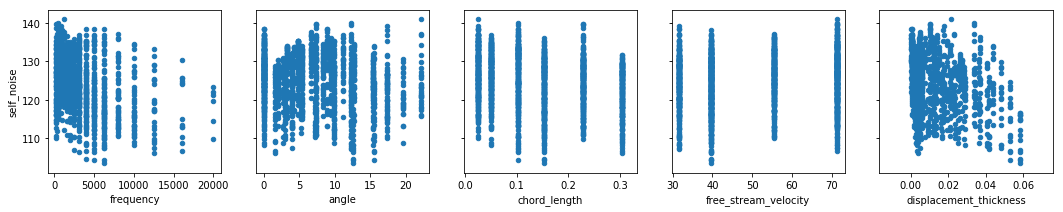

In [11]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, sharey=True, figsize=(18, 3))

noise.plot(kind='scatter', x='frequency', y='self_noise', ax=ax0)
noise.plot(kind='scatter', x='angle', y='self_noise', ax=ax1)
noise.plot(kind='scatter', x='chord_length', y='self_noise', ax=ax2)
noise.plot(kind='scatter', x='free_stream_velocity', y='self_noise', ax=ax3)
noise.plot(kind='scatter', x='displacement_thickness', y='self_noise', ax=ax4);

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

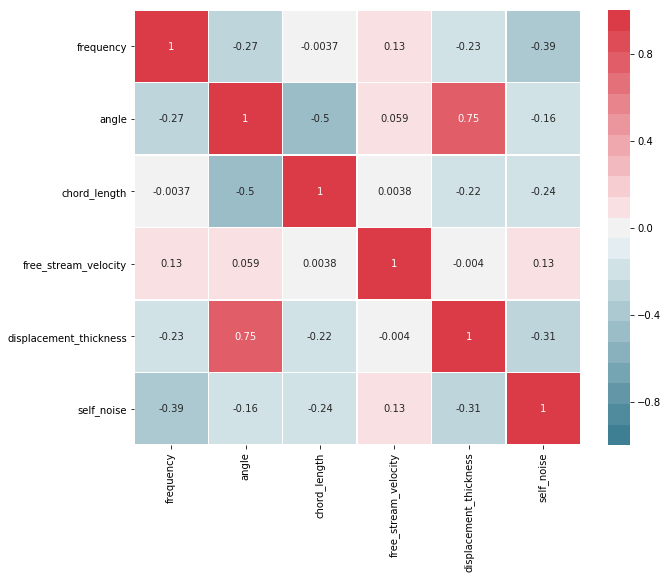

In [12]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(noise.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), annot=True, linewidths=.5, ax=ax);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

free_stream_velocity appears to be the only feature that positively correlates to the target, and displacement_thickness and angle may be co-correlated (though I did attempt removing pone other or both and the model performed more poorly)

- Develop a linear regression model to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_col = 'self_noise'
X = noise.drop(target_col, axis='columns')
y = noise.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X,y))
print('Training Set Score:', lr.score(X_train, y_train))
print('Test Set Score:', lr.score(X_test, y_test))

0.5141365931438566
Training Set Score: 0.49232393745692815
Test Set Score: 0.5516854908226795


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Training set performed favourably compared to the null model (as the r2 of the null model would be 0)

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Model performed c.5% better on testing set, though overall scores are mid-range, so there is both bias and variance

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

More of a bias problem (relatively small number of features, model would benefit from becoming more flexible) - fix bias then variance

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

target_col = 'self_noise'
X = noise.drop(target_col, axis='columns')
y = noise.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9904264832306672
0.9281891176996118


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Predictive performance hugely increased, bias reduced but near perfect train score, so variance to be addressed

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

I will try tuning the hyperparameters of the rfr to reduce model flexibility, in order to reduce the gap between the train and test set while retaining test performances

In [19]:
target_col = 'self_noise'
X2 = noise.drop(target_col, axis='columns')
y2 = noise.loc[:, target_col]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3)

rfr2 = RandomForestRegressor(n_estimators=75, max_depth=10)

rfr2.fit(X2_train, y2_train)

print(rfr2.score(X2_train, y2_train))
print(rfr2.score(X2_test, y2_test))

0.9696506884995869
0.9232651176209014


- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This is a dataset relating to credit card applications in which all attribute names and values have been anonymized to unidentifiable values to preserve confidentiality. A model for this dataset could be used in order to determine credit card approval/rejection

In [20]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [21]:
credit.shape

(690, 16)

- Find out what data types are present.

In [22]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [23]:
# view values for column 2
credit.loc[:, 2].value_counts()
# 12 rows with ?

?        12
22.67     9
20.42     7
22.50     6
19.17     6
20.67     6
25.00     6
23.58     6
18.83     6
24.50     6
27.83     5
23.08     5
33.17     5
23.25     5
27.67     5
23.00     5
25.67     4
22.08     4
20.75     4
26.17     4
29.50     4
35.17     4
32.33     4
28.58     4
23.50     4
41.17     4
22.92     4
20.00     4
34.17     4
25.17     4
         ..
35.42     1
42.50     1
45.83     1
51.42     1
63.33     1
65.42     1
40.00     1
30.75     1
30.00     1
19.75     1
52.33     1
31.33     1
28.42     1
54.83     1
26.25     1
49.50     1
17.50     1
43.08     1
62.75     1
41.42     1
47.25     1
18.33     1
30.42     1
35.58     1
38.42     1
69.50     1
44.17     1
67.75     1
56.00     1
29.75     1
Name: 2, Length: 350, dtype: int64

In [24]:
# convert columns 2 & 14 from object to numeric

credit.loc[:, 2] = pd.to_numeric((credit.loc[:, 2]), errors='coerce')
credit.loc[:, 14] = pd.to_numeric((credit.loc[:, 14]), errors='coerce')

In [25]:
# handle ? in columns 2 & 14 by replacing with mean

credit.loc[:, 2] = credit.loc[:, 2].fillna(credit.loc[:, 2].mean())
credit.loc[:, 14] = credit.loc[:, 14].fillna(credit.loc[:, 14].mean())

In [26]:
# check data types are now correct
credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14    float64
15      int64
16     object
dtype: object

In [27]:
# check values replaced

#credit.loc[:, 2].value_counts()
credit.loc[:, 14].value_counts()

0.000000       132
120.000000      35
200.000000      35
160.000000      34
100.000000      30
80.000000       30
280.000000      22
180.000000      18
140.000000      16
320.000000      14
240.000000      14
184.014771      13
300.000000      13
260.000000      11
60.000000        9
400.000000       9
220.000000       9
360.000000       7
340.000000       7
380.000000       5
440.000000       4
40.000000        4
132.000000       4
144.000000       4
520.000000       4
232.000000       4
420.000000       4
108.000000       4
70.000000        4
96.000000        3
              ... 
17.000000        1
174.000000       1
62.000000        1
45.000000        1
356.000000       1
2000.000000      1
371.000000       1
178.000000       1
276.000000       1
372.000000       1
640.000000       1
760.000000       1
680.000000       1
208.000000       1
523.000000       1
309.000000       1
487.000000       1
349.000000       1
381.000000       1
491.000000       1
329.000000       1
256.000000  

In [28]:
# convert target column (16) into a target flag, drop column 16, check data
credit.loc[:, 'target'] = (credit.loc[:, 16] == '+').astype(int)
credit = credit.drop(16, axis='columns')
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


- Find out how many null values there are in each columns.

In [29]:
credit.isna().sum()

1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
target    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [30]:
credit.describe()

,2,3,8,11,14,15,target
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


In [31]:
credit.describe(include='object')

,1,4,5,6,7,9,10,12,13
count,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,468,519,519,137,399,361,395,374,625


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

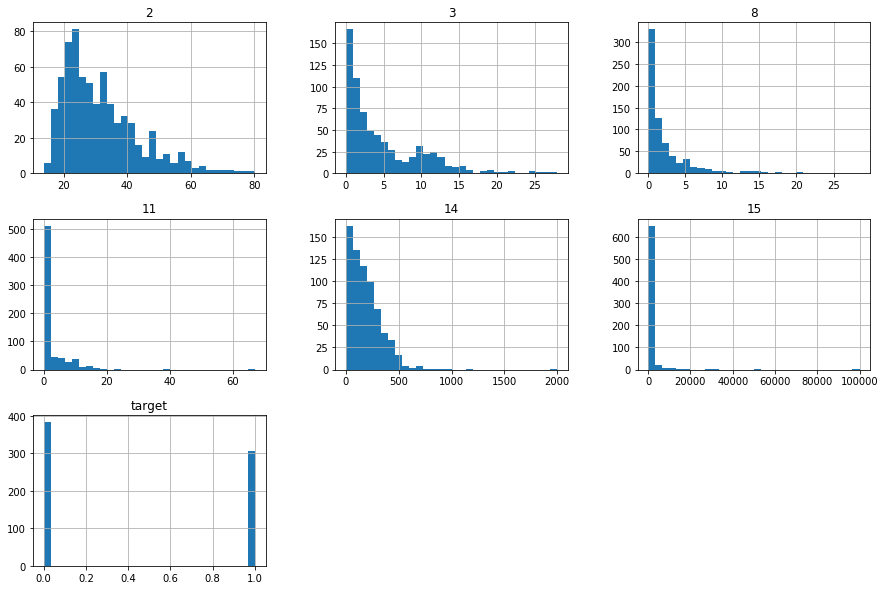

In [32]:
axes = credit.hist(figsize=(15, 10),bins=30)

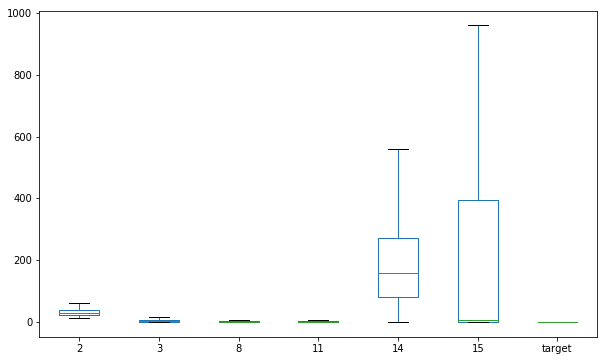

In [33]:
axes = credit.plot(kind='box',figsize=(10, 6), showfliers=False);

- Which variables are approximately normally distributed?

Column 2 shows the closest to normal distribution

- Which variables show strong skew?

11 and 16 show the strongest (right) skew, with 3, 8 and 14 also showing fairly strong (right) skew

- Make a scatterplot of each feature variable with the target variable.

''

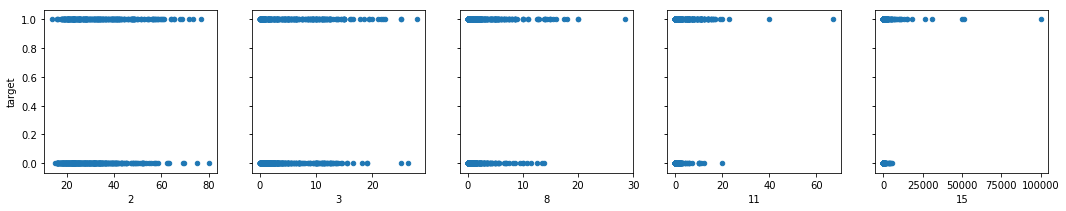

In [34]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, sharey=True, figsize=(18, 3))

credit.plot(kind='scatter', x=2, y='target', ax=ax0)
credit.plot(kind='scatter', x=3, y='target', ax=ax1)
credit.plot(kind='scatter', x=8, y='target', ax=ax2)
credit.plot(kind='scatter', x=11, y='target', ax=ax3)
credit.plot(kind='scatter', x=15, y='target', ax=ax4)
;

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

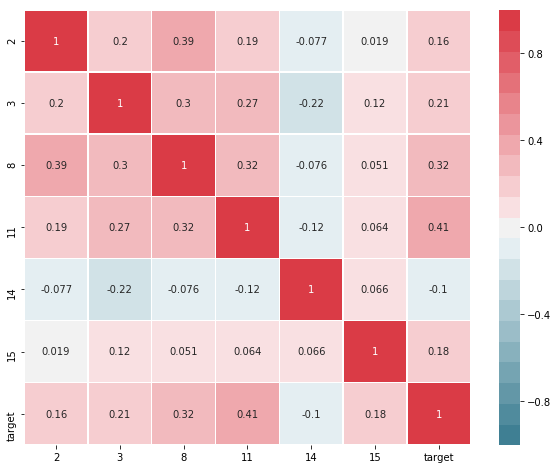

In [35]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(credit.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, annot=True, ax=ax);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [36]:
credit.loc[:, 'target'].value_counts()

0    383
1    307
Name: target, dtype: int64

In [37]:
383/(383 + 307)

0.5550724637681159

- Develop a logistic regression model to predict the target variable. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [38]:
credit_dummied = pd.get_dummies(credit, columns=[ 1, 4, 5, 6, 7, 9, 10, 12, 13])
credit_dummied.columns

Index([       2,        3,        8,       11,       14,       15, 'target',
          '1_?',    '1_a',    '1_b',    '4_?',    '4_l',    '4_u',    '4_y',
          '5_?',    '5_g',   '5_gg',    '5_p',    '6_?',   '6_aa',    '6_c',
         '6_cc',    '6_d',    '6_e',   '6_ff',    '6_i',    '6_j',    '6_k',
          '6_m',    '6_q',    '6_r',    '6_w',    '6_x',    '7_?',   '7_bb',
         '7_dd',   '7_ff',    '7_h',    '7_j',    '7_n',    '7_o',    '7_v',
          '7_z',    '9_f',    '9_t',   '10_f',   '10_t',   '12_f',   '12_t',
         '13_g',   '13_p',   '13_s'],
      dtype='object')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'target'

X = credit_dummied.drop(target_col, axis='columns')
y = credit_dummied.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

lor = LogisticRegression()
lor.fit(X_train, y_train)
print(lor.score(X_train, y_train))
print(lor.score(X_test, y_test))
print(y.value_counts(normalize=True))

0.8944099378881988
0.8260869565217391
0    0.555072
1    0.444928
Name: target, dtype: float64


C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Hugely improved performance (55% v 86%) - both bias and variance have been much reduced

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Similar/slightly higher results on test as on train (86-87% v 87-88%)

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model shows somewhat higher train than test, indicating some overfit, thus variance problem

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

target_col = 'target'

X = credit_dummied.drop(target_col, axis='columns')
y = credit_dummied.loc[:, target_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfc = RandomForestClassifier(100)

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8792270531400966


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Test set prediction has improved compared to the logistic regression, however training set score is 100%  - overfitting/high variance

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

I intend to tune the hyperparameters to make the model less flexible, to bring down the variance and gap between train and test 

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

target_col = 'target'

X = credit_dummied.drop(target_col, axis='columns')
y = credit_dummied.loc[:, target_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfc = RandomForestClassifier(n_estimators=100, max_depth=5)#, oob_score=True)

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9337474120082816
0.8840579710144928


- **BONUS:** Keep going! Find ways to make your model better.